**WRANGLING NEUROELECTRO DATA**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel ('neurophysiology_data.xlsx')
mouse_df = pd.DataFrame (df)
mouse_df

#pull out all the rows where "CA3" is in the NeuroType column and create a new DataFrame 
df_CA3 = df[df['NeuronType'].str.contains('CA3')].reset_index(drop=True)
df_CA3

#did the same thing for CA1 cells 
df_CA1 = df[df['NeuronType'].str.contains('CA1')].reset_index(drop=True)
df_CA1

#get all the columns of df_CA3 with ephys we are interested in
print(df_CA3[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

#did the same thing for df_CA1
print(df_CA1[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.54             NaN
1               NaN            0.84             NaN
2               NaN            1.70            85.0
3               NaN            0.79             NaN
4               NaN            1.70            80.0
5             118.0             NaN            74.5
6               NaN            0.55            92.2
7               NaN            1.30            73.9
8               NaN            1.18             NaN
9               NaN             NaN             NaN
10              NaN            1.10            76.0
11              NaN            0.57             NaN
    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.40             NaN
1               NaN             NaN             NaN
2               NaN             NaN             NaN
3               NaN            0.67             NaN
4             206.0             NaN             NaN
5           

**WRANGLING ALLEN NEUROPIXEL DATA**

In [2]:
# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx]) 
        
        
session = cache.get_session_data(session_ca3_list[0])
allen_ca3 = session.units[session.units.ecephys_structure_acronym=='CA3']
allen_ca3_amplitude = allen_ca3['waveform_amplitude']
allen_ca3_half_width = allen_ca3['waveform_halfwidth']
allen_ca3_firing_rate = allen_ca3['firing_rate']

session_a = cache.get_session_data(session_ca1_list[0])
allen_ca1 = session_a.units[session.units.ecephys_structure_acronym == 'CA1']
allen_ca1_amplitude = allen_ca1['waveform_amplitude']
allen_ca1_half_width = allen_ca1['waveform_halfwidth']
allen_ca1_firing_rate = allen_ca1['firing_rate']

print(allen_ca1_firing_rate)

unit_id
950911195     8.201781
950911223    15.087965
950911266    23.864839
950911286     2.396609
950912928     0.983724
               ...    
950954922     3.566261
950955053    16.898391
950955212     4.665299
950955361     3.913271
950955399    24.848122
Name: firing_rate, Length: 145, dtype: float64


**FIRING RATE BOX PLOT FOR CA1**

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


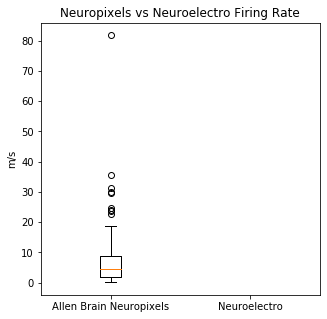

In [12]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_firing_rate, df_CA1[['FiringFrequency']]]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

**FIRING RATE BOX PLOT FOR CA3**

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


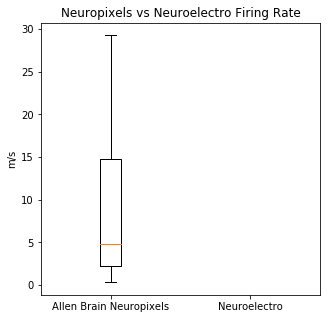

In [14]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_firing_rate, df_CA3[['FiringFrequency']]]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

**SPIKE HALF WIDTH BOX PLOT FOR CA1**

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


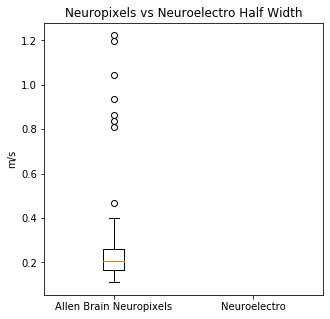

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_half_width, df_CA1[['SpikeHalfWidth']]]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

**SPIKE HALF WIDTH BOX PLOT FOR CA3**

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


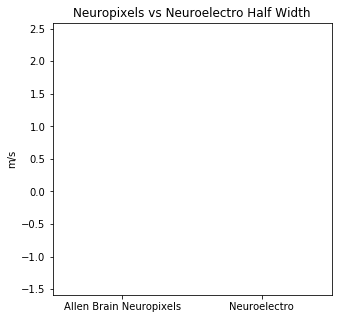

In [17]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_half_width, df_CA3[['SpikeHalfWidth']]]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

**WAVEFORM AMPLITUDE BOX PLOT FOR CA1**

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


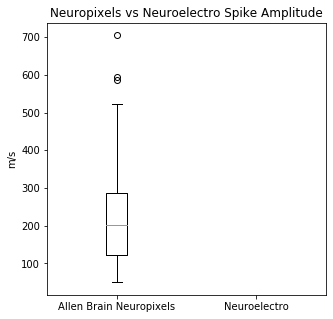

In [18]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_amplitude, df_CA1[['SpikeAmplitude']]]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
plt.show()

**WAVEFORM AMPLITUDE BOX PLOT FOR CA3**

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


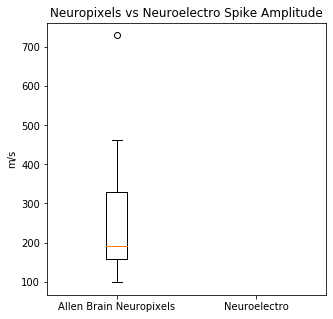

In [20]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_amplitude, df_CA3[['SpikeAmplitude']]]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
plt.show()